# Stage 3: Autoencoder for Anomaly Detection for IoT 1,3,5 and 6

The autoencoder (AE) anomaly detection model used in this project work as follow:

1. we only used the benign data when training the AE model
2. It identify anomalies by trying to recreate the input data
3. When the model fail to create the input with low RMSE, we can conclude that it's an anomaly

In [1]:
# set all random variables
import os
import numpy as np
import random
import tensorflow as tf

seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [2]:
#import all required library
import keras
from keras.models import Sequential
from keras import regularizers, Model
from keras.layers import Dense, Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from keras import backend

Using TensorFlow backend.


In [3]:
#Define all afunctions

#Create predict function
def predict(mse, treshold):
    prd = []
    for i in mse:
        if i > treshold:
            prd.append(1)
        else: prd.append(0)
            
    return np.asarray(prd)

#Create RMSE function that acccept numpy array
def np_rmse(y_pred, y_true):
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2), axis=1))

#Create RMSE function for Keras model
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Train the AE model on IoT 1,3,5 and 6 benign data

In [4]:
#load the benign data
device3 = pd.read_csv("3.benign.csv")
device6 = pd.read_csv("6.benign.csv")
device1 = pd.read_csv("1.benign.csv")
device5 = pd.read_csv("5.benign.csv")

all_benign = pd.concat([device6,device3,device1, device5])
all_benign['label'] = 0

#split to train and test
all_benign, all_benign_test,_,_ = train_test_split(all_benign.iloc[:,:-1].values, 
                                all_benign.iloc[:,-1].values, test_size=0.5, random_state=42)

#scale train benign data
scaler = StandardScaler()
scaler.fit(all_benign)
all_benign = scaler.transform(all_benign)

In [5]:
#create autoencoder model
input_layer = Input(shape=(all_benign.shape[1],))

encoded = Dense(110, activation='relu', activity_regularizer=regularizers.l1_l2(l1=10e-6, l2=10e-6))(input_layer)
encoded = Dense(95, activation='relu')(encoded)
encoded = Dense(20)(encoded)
decoded = Dense(95, activation='relu')(encoded)
decoded = Dense(110, activation='relu')(decoded)
output_layer = Dense(all_benign.shape[1])(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer= 'adadelta', loss=rmse)

# fit the model
autoencoder.fit(all_benign, all_benign, batch_size = 100, epochs = 450, validation_split = 0.20)

Train on 99726 samples, validate on 24932 samples
Epoch 1/450
99726/99726 [==============================] - 4s 44us/step - loss: 0.2822 - val_loss: 0.2202
Epoch 2/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.1649 - val_loss: 0.1829
Epoch 3/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.1351 - val_loss: 0.1293
Epoch 4/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.1203 - val_loss: 0.1540
Epoch 5/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.1114 - val_loss: 0.1200
Epoch 6/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.1063 - val_loss: 0.1019
Epoch 7/450
99726/99726 [==============================] - 3s 35us/step - loss: 0.1007 - val_loss: 0.1129
Epoch 8/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0976 - val_loss: 0.1233
Epoch 9/450
99726/99726 [==============================] - 3s 35us/step - loss: 0.0944 - val_loss: 0.0

99726/99726 [==============================] - 3s 33us/step - loss: 0.0489 - val_loss: 0.0556
Epoch 154/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0488 - val_loss: 0.0553
Epoch 155/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0486 - val_loss: 0.0566
Epoch 156/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0487 - val_loss: 0.0539
Epoch 157/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0488 - val_loss: 0.0500
Epoch 158/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0487 - val_loss: 0.0527
Epoch 159/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0486 - val_loss: 0.0562
Epoch 160/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0485 - val_loss: 0.0538
Epoch 161/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0484 - val_loss: 0.0545
Epoch 162/450
99726/99726 [===============

Epoch 229/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0459 - val_loss: 0.0567
Epoch 230/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0460 - val_loss: 0.0586
Epoch 231/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0460 - val_loss: 0.0536
Epoch 232/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0460 - val_loss: 0.0476
Epoch 233/450
99726/99726 [==============================] - 4s 36us/step - loss: 0.0460 - val_loss: 0.0518
Epoch 234/450
99726/99726 [==============================] - 3s 35us/step - loss: 0.0460 - val_loss: 0.0506
Epoch 235/450
99726/99726 [==============================] - 3s 35us/step - loss: 0.0458 - val_loss: 0.0495
Epoch 236/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0458 - val_loss: 0.0528
Epoch 237/450
99726/99726 [==============================] - 3s 35us/step - loss: 0.0457 - val_loss: 0.0550
Epoch 238/450
99726/99726 [=

Epoch 305/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0440 - val_loss: 0.0560
Epoch 306/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0440 - val_loss: 0.0486
Epoch 307/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0438 - val_loss: 0.0472
Epoch 308/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0437 - val_loss: 0.0552
Epoch 309/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0438 - val_loss: 0.0504
Epoch 310/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0438 - val_loss: 0.0557
Epoch 311/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0437 - val_loss: 0.0470
Epoch 312/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0437 - val_loss: 0.0554
Epoch 313/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0437 - val_loss: 0.0463
Epoch 314/450
99726/99726 [=

Epoch 381/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0425 - val_loss: 0.0498
Epoch 382/450
99726/99726 [==============================] - 3s 34us/step - loss: 0.0425 - val_loss: 0.0447
Epoch 383/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0426 - val_loss: 0.0520
Epoch 384/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0424 - val_loss: 0.0470
Epoch 385/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0423 - val_loss: 0.0605
Epoch 386/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0424 - val_loss: 0.0484
Epoch 387/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0423 - val_loss: 0.0467
Epoch 388/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0423 - val_loss: 0.0445
Epoch 389/450
99726/99726 [==============================] - 3s 33us/step - loss: 0.0423 - val_loss: 0.0543
Epoch 390/450
99726/99726 [=

In [6]:
#Load the anomaly data
data30 = pd.read_csv("3.gafgyt.combo.csv")
data31 = pd.read_csv("3.gafgyt.junk.csv")
data32 = pd.read_csv("3.gafgyt.scan.csv")
data33 = pd.read_csv("3.gafgyt.tcp.csv")
data34 = pd.read_csv("3.gafgyt.udp.csv")

data50 = pd.read_csv("5.gafgyt.combo.csv")
data51 = pd.read_csv("5.gafgyt.junk.csv")
data52 = pd.read_csv("5.gafgyt.scan.csv")
data53 = pd.read_csv("5.gafgyt.tcp.csv")
data54 = pd.read_csv("5.gafgyt.udp.csv")
data55 = pd.read_csv("5.mirai.ack.csv")
data56 = pd.read_csv("5.mirai.scan.csv")
data57 = pd.read_csv("5.mirai.syn.csv")
data58 = pd.read_csv("5.mirai.udp.csv")
data59 = pd.read_csv("5.mirai.udpplain.csv")

data10 = pd.read_csv("1.gafgyt.combo.csv")
data11 = pd.read_csv("1.gafgyt.junk.csv")
data12 = pd.read_csv("1.gafgyt.scan.csv")
data13 = pd.read_csv("1.gafgyt.tcp.csv")
data14 = pd.read_csv("1.gafgyt.udp.csv")
data15 = pd.read_csv("1.mirai.ack.csv")
data16 = pd.read_csv("1.mirai.scan.csv")
data17 = pd.read_csv("1.mirai.syn.csv")
data18 = pd.read_csv("1.mirai.udp.csv")
data19 = pd.read_csv("1.mirai.udpplain.csv")

data60 = pd.read_csv("6.gafgyt.combo.csv")
data61 = pd.read_csv("6.gafgyt.junk.csv")
data62 = pd.read_csv("6.gafgyt.scan.csv")
data63 = pd.read_csv("6.gafgyt.tcp.csv")
data64 = pd.read_csv("6.gafgyt.udp.csv")
data65 = pd.read_csv("6.mirai.ack.csv")
data66 = pd.read_csv("6.mirai.scan.csv")
data67 = pd.read_csv("6.mirai.syn.csv")
data68 = pd.read_csv("6.mirai.udp.csv")
data69 = pd.read_csv("6.mirai.udpplain.csv")


anomaly = pd.concat([data50, data51, data52, data53, data54, data55, data56, data57, data58, data59,
                     data60, data61, data62, data63, data64, data65, data66, data67, data68, data69,
                     data30, data31, data32, data33, data34,
                     data10, data11, data12, data13, data14, data15, data16, data17, data18, data19])

column_names = [anomaly.columns.values]

#scale anomaly data and label as one
anomaly = scaler.transform(anomaly)
anomaly = pd.DataFrame(anomaly,columns = column_names)
anomaly['label'] = 1

#scale benign data and give label zero
all_benign_test = scaler.transform(all_benign_test)
all_benign_test = pd.DataFrame(all_benign_test, columns = column_names)
all_benign_test['label'] = 0

#concat benign and anomaly data together
test_data = pd.concat([anomaly,all_benign_test])

#shuffle the data
test_data = test_data.sample(frac=1, random_state=42)

#compressed the data for other AD model
compressed_data = encoder.predict(test_data.iloc[:,:-1])

#save compressed data as pkl
compressed_train_data, compressed_test_data,compressed_train_label,compressed_test_label = train_test_split(compressed_data, 
                                                   test_data.iloc[:,-1].values, test_size=0.3, random_state=42)

compressed_train_data = pd.DataFrame(compressed_train_data)
compressed_train_data['label'] = compressed_train_label

compressed_test_data = pd.DataFrame(compressed_test_data)
compressed_test_data['label'] = compressed_test_label

cluster = pd.concat([compressed_test_data,compressed_train_data])
cluster.to_csv('cluster_1356.csv')
cluster.to_pickle('cluster_1356.pkl')

Find the best RMSE threshold to predict anomalies

In [7]:
# use 33% for validation
val_data = test_data.iloc[:(test_data.shape[0]//3),:]
print("Val data shape:",val_data.shape)
test_data = test_data.iloc[(test_data.shape[0]//3):,:]
print("Test data shape:",test_data.shape)

Val data shape: (971430, 116)
Test data shape: (1942861, 116)


In [8]:
#predict the validation data
compressed_val_data = autoencoder.predict(val_data.iloc[:,:-1])
rmse_val356 = np_rmse(compressed_val_data, val_data.iloc[:,:-1].values)

In [9]:
#Find the best threshold for the rmse using validation data
rmse_list = [0.18, 0.2, 0.22, 0.25, 0.28,0.3]

for i in rmse_list:
    prd_val_356 = predict(rmse_val356,i)
    print('\n RMSE THreshold:',i)
    cf = pd.DataFrame(confusion_matrix(val_data.iloc[:,-1].values,prd_val_356,normalize = 'true',labels=[0,1]), 
                      index=['0', '1'],
                     columns = ['0', '1'])
    
    print(cf)


 RMSE THreshold: 0.18
          0         1
0  0.987061  0.012939
1  0.000017  0.999983

 RMSE THreshold: 0.2
          0         1
0  0.990182  0.009818
1  0.000026  0.999974

 RMSE THreshold: 0.22
          0         1
0  0.992222  0.007778
1  0.000040  0.999960

 RMSE THreshold: 0.25
          0         1
0  0.993759  0.006241
1  0.288528  0.711472

 RMSE THreshold: 0.28
          0         1
0  0.994695  0.005305
1  0.288540  0.711460

 RMSE THreshold: 0.3
          0         1
0  0.995079  0.004921
1  0.288548  0.711452


Evaluate AE as AD for IoT 1,3,5 and 6 using the test data

In [10]:
#predict test data
compressed_test_data = autoencoder.predict(test_data.iloc[:,:-1])
rmse356 = np_rmse(compressed_test_data, test_data.iloc[:,:-1].values)

In [16]:
#use the best threshold from validation step
prd_test_356 = predict(rmse356,0.22)

In [17]:
from sklearn.metrics import confusion_matrix
cf = pd.DataFrame(confusion_matrix(test_data.iloc[:,-1].values, prd_test_356,normalize = 'true',labels=[0,1]), 
                  index=['0', '1'],
                 columns = ['0', '1'])

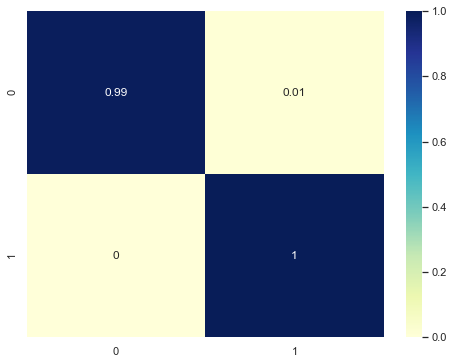

In [18]:
#Visualise confusion matrix
import seaborn as sns; sns.set()
size = (8, 6)
fig, ax = plt.subplots(figsize=size)
ax = sns.heatmap(cf.round(2),ax = ax, cmap="YlGnBu", annot=True)

In [19]:
cf

,0,1
0,0.990578,0.009422
1,0.000030,0.999970


In [20]:
accuracy_score(test_data.iloc[:,-1].values, prd_test_356,normalize = 'true')

0.9995691920317511

There is no unseed device for this cluster